In [2]:
!pip install openai --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


### Load the model

In [3]:
from openai import OpenAI
import os
from google.colab import userdata

model_name = "gpt-4o"
client = OpenAI(
    api_key = userdata.get('OPENAI_API_KEY')
)

### Chat Completions

In [4]:
completion = client.chat.completions.create(
    model = model_name,
    messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant. Help me with the following problem."
        },
        {
            "role": "user",
            "content": "Solve the following equation to get the value of X, '2X + 5 = 9'"
        }
    ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: To solve the equation \( 2X + 5 = 9 \) for \( X \):

1. Subtract 5 from both sides of the equation to isolate the term with \( X \):
   \[
   2X + 5 - 5 = 9 - 5
   \]
   Simplifying this, you get:
   \[
   2X = 4
   \]

2. Divide both sides by 2 to solve for \( X \):
   \[
   \frac{2X}{2} = \frac{4}{2}
   \]
   Simplifying this, you get:
   \[
   X = 2
   \]

So, the value of \( X \) is \( 2 \).


In [5]:
completion = client.chat.completions.create(
    model = model_name,
    messages = [
        {
            "role": "user",
            "content": "What is the capital of Egypt and what it is famous for?"
        }
    ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: The capital of Egypt is Cairo. It is famous for its rich history and cultural heritage, being one of the oldest cities in the world. Some key highlights that make Cairo renowned include:

1. **Pyramids of Giza**: Located on the outskirts of Cairo, these ancient structures, including the Great Pyramid, are among the most famous landmarks in the world.
2. **The Sphinx**: Also located near the Pyramids of Giza, this iconic limestone statue combines the body of a lion with the head of a pharaoh.
3. **The Egyptian Museum**: This museum houses an extensive collection of ancient Egyptian antiquities, including the treasures of Tutankhamun.
4. **Historic Islamic Architecture**: Cairo is home to numerous impressive mosques, such as the Al-Azhar Mosque and the Mosque of Muhammad Ali, showcasing stunning Islamic architecture.
5. **Cultural Heritage**: Cairo's vibrant culture includes bustling bazaars like the Khan El Khalili market, traditional music, dance, and rich cuisine.
6. **The 

### Json mode

In [6]:
import json

completion = client.chat.completions.create(
    model = model_name,
    response_format = {
        "type": "json_object"
    },
    messages = [
        {
            "role": "system",
            "content": "You are a helpful trainer that always responds in JSON format."
        },
        {
            "role": "user",
            "content": "I want to lose 5 kgs in one month, create a workout routine that helps me with that."
        }
    ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='{\n  "WorkoutRoutine": {\n    "Duration": "1 Month",\n    "Objective": "Lose 5 kgs",\n    "WeeklySchedule": {\n      "Monday": {\n        "Cardio": "30 minutes running or jogging",\n        "StrengthTraining": {\n          "Exercises": ["Squats", "Push-ups", "Lunges", "Plank"],\n          "Reps": "3 sets of 12-15 reps each"\n        }\n      },\n      "Tuesday": {\n        "Cardio": "30 minutes cycling or brisk walking",\n        "StrengthTraining": {\n          "Exercises": ["Deadlifts", "Bicep Curls", "Tricep Dips", "Russian Twists"],\n          "Reps": "3 sets of 12-15 reps each"\n        }\n      },\n      "Wednesday": {\n        "Activity": "Yoga or Pilates",\n        "Duration": "45-60 minutes"\n      },\n      "Thursday": {\n        "Cardio": "30 minutes running or jogging",\n        "StrengthTraining": {\n          "Exercises": ["Leg Press", "Chest Press", "Pull-ups", "Mountain Climbers"],\n          "Reps": "3 sets of 12-15 reps each"\n        }\

In [7]:
json.loads(completion.choices[0].message.content)

{'WorkoutRoutine': {'Duration': '1 Month',
  'Objective': 'Lose 5 kgs',
  'WeeklySchedule': {'Monday': {'Cardio': '30 minutes running or jogging',
    'StrengthTraining': {'Exercises': ['Squats',
      'Push-ups',
      'Lunges',
      'Plank'],
     'Reps': '3 sets of 12-15 reps each'}},
   'Tuesday': {'Cardio': '30 minutes cycling or brisk walking',
    'StrengthTraining': {'Exercises': ['Deadlifts',
      'Bicep Curls',
      'Tricep Dips',
      'Russian Twists'],
     'Reps': '3 sets of 12-15 reps each'}},
   'Wednesday': {'Activity': 'Yoga or Pilates', 'Duration': '45-60 minutes'},
   'Thursday': {'Cardio': '30 minutes running or jogging',
    'StrengthTraining': {'Exercises': ['Leg Press',
      'Chest Press',
      'Pull-ups',
      'Mountain Climbers'],
     'Reps': '3 sets of 12-15 reps each'}},
   'Friday': {'Cardio': '30 minutes swimming or rowing',
    'StrengthTraining': {'Exercises': ['Overhead Press',
      'Hamstring Curls',
      'Calf Raises',
      'Bicycle Crunches

### Image Understanding

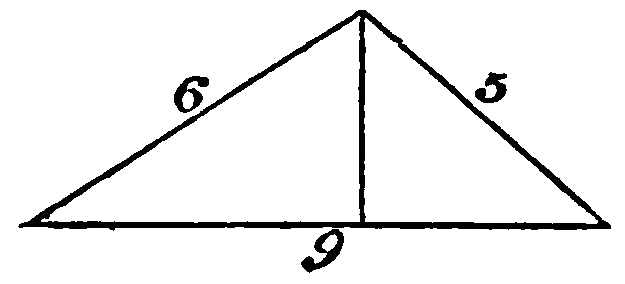

In [10]:
from IPython.display import Image, display

path = "/content/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"

display(Image(path))

In [8]:
response = client.chat.completions.create(
    model = model_name,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"
        },
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What's the area of the triangle?"},
                {"type": "image_url", "image_url": {"url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}}
              ]
        }
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. Heron's formula states that the area of a triangle with sides of length \(a\), \(b\), and \(c\) is:

\[ \text{Area} = \sqrt{s(s-a)(s-b)(s-c)} \]

where \(s\) is the semi-perimeter of the triangle:

\[ s = \frac{a + b + c}{2} \]

For the given triangle, the side lengths are \(a = 6\), \(b = 5\), and \(c = 9\).

First, calculate the semi-perimeter \(s\):

\[ s = \frac{6 + 5 + 9}{2} = \frac{20}{2} = 10 \]

Now, apply Heron's formula:

\[ \text{Area} = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ \text{Area} = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} \]
\[ \text{Area} = \sqrt{200} \]
\[ \text{Area} = 10\sqrt{2} \]

So, the area of the triangle is \(10\sqrt{2}\) square units.


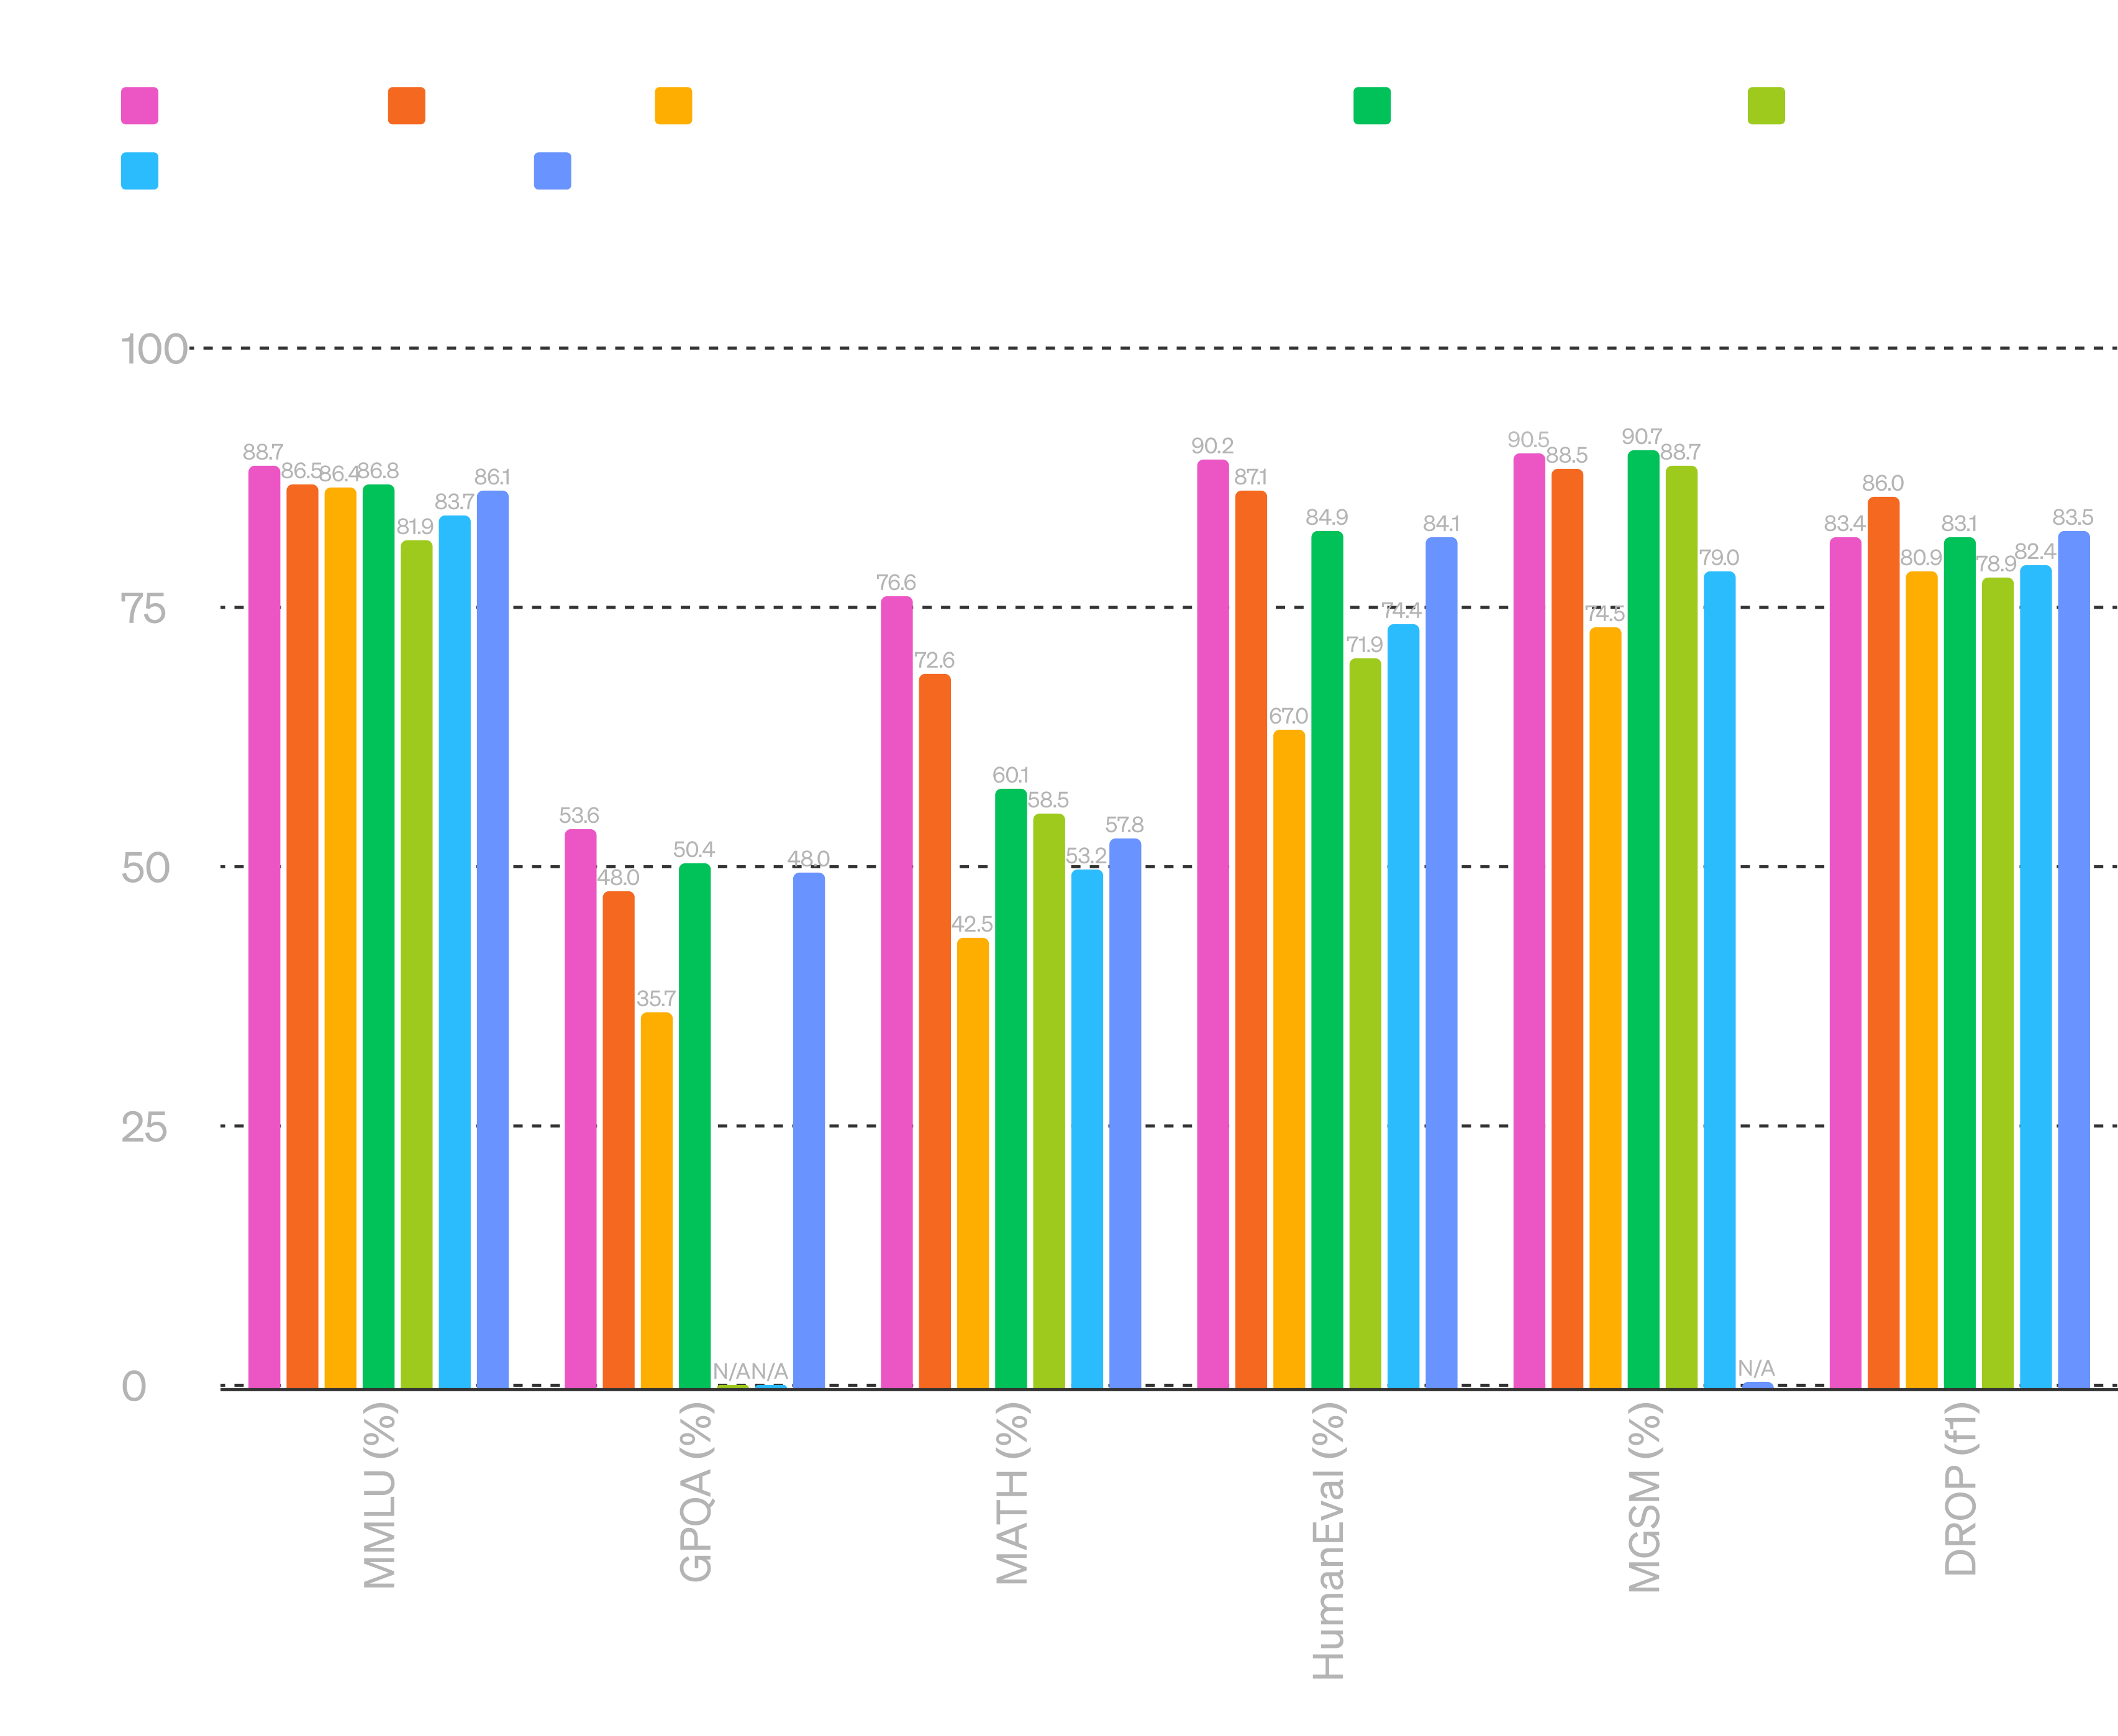

In [11]:
from IPython.display import Image, display

path = "/content/gpt-40-01_dark.png"

display(Image(path))

In [9]:
response = client.chat.completions.create(
    model = model_name,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that responds in Markdown."
        },
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Can you explain what you see in this image?"},
                {"type": "image_url", "image_url": {"url": "https://images.ctfassets.net/kftzwdyauwt9/3Y5UXKbx1ZIQYF4dg585eH/1a6da79d0ab3b8d3a2fd23aae1f21075/gpt-40-01_dark.png"}}
              ]
        }
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

This image is a bar chart titled "Text Evaluation" that compares the performance of various models across different evaluation metrics. The models compared are:

- GPT-4o (pink)
- GPT-4T (red)
- GPT-4 (initial release 23-03-14) (orange)
- Claude 3 Opus (green)
- Gemini Pro 1.5 (yellow)
- Gemini Ultra 1.0 (blue)
- Llama3 400b (purple)

The evaluation metrics are:

1. MMLU (%)
2. GPCQA (%)
3. MATH (%)
4. HumanEval (%)
5. MGSM (%)
6. DROP (f1)

Each metric has a corresponding set of bars representing the performance of each model in percentage terms. Here are the observations for each metric:

1. **MMLU (%)**:
   - GPT-4o: 88.7%
   - GPT-4T: 86.8%
   - GPT-4 (initial release 23-03-14): 86.8%
   - Claude 3 Opus: 81.9%
   - Gemini Pro 1.5: 83.7%
   - Gemini Ultra 1.0: 86.1%
   - Llama3 400b: 79.6%

2. **GPCQA (%)**:
   - GPT-4o: 53.6%
   - GPT-4T: 48.0%
   - GPT-4 (initial release 23-03-14): 50.4%
   - Claude 3 Opus: 35.7%
   - Gemini Pro 1.5: N/A
   - Gemini Ultra 1.0: N/A
   - Llama3 400b

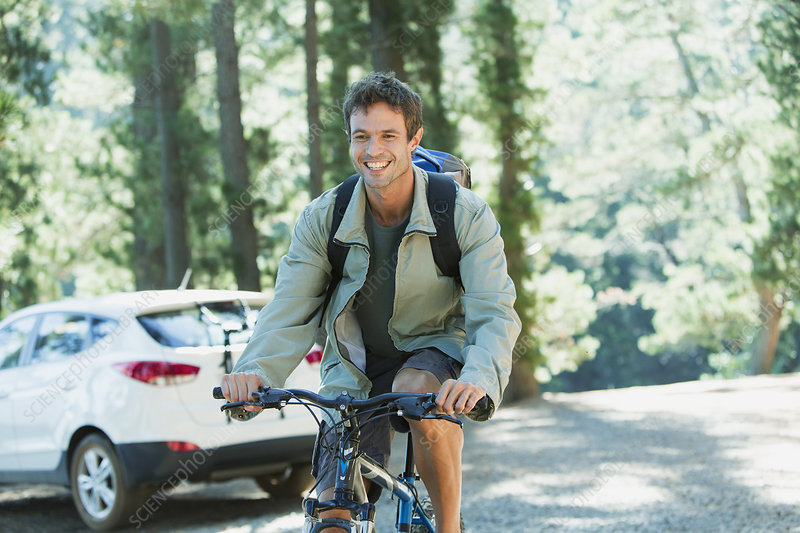

In [12]:
from IPython.display import Image, display

path = "/content/f0308104-800px-wm.jpg"

display(Image(path))

In [14]:
response = client.chat.completions.create(
    model = model_name,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that responds in Markdown."
        },
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What do you see in this image?"},
                {"type": "image_url", "image_url": {"url": "https://media.sciencephoto.com/f0/30/81/04/f0308104-800px-wm.jpg"}}
              ]
        }
    ],
    temperature=0.0,
)

response.choices[0].message.content

'The image shows a person riding a bicycle in an outdoor setting, likely a forest or park. The person is smiling and appears to be enjoying the ride. They are wearing a light jacket and have a backpack on. In the background, there is a white car parked among trees. The overall atmosphere of the image suggests a pleasant and leisurely outdoor activity.'